## Import important libraries 

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

# Models from scikit learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [49]:
df = pd.read_csv('heart-disease.csv')
df.shape # There are 303 rows and 14 columns (Features)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [52]:
df.isnull().sum() ## looks like dataset don't have any null values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


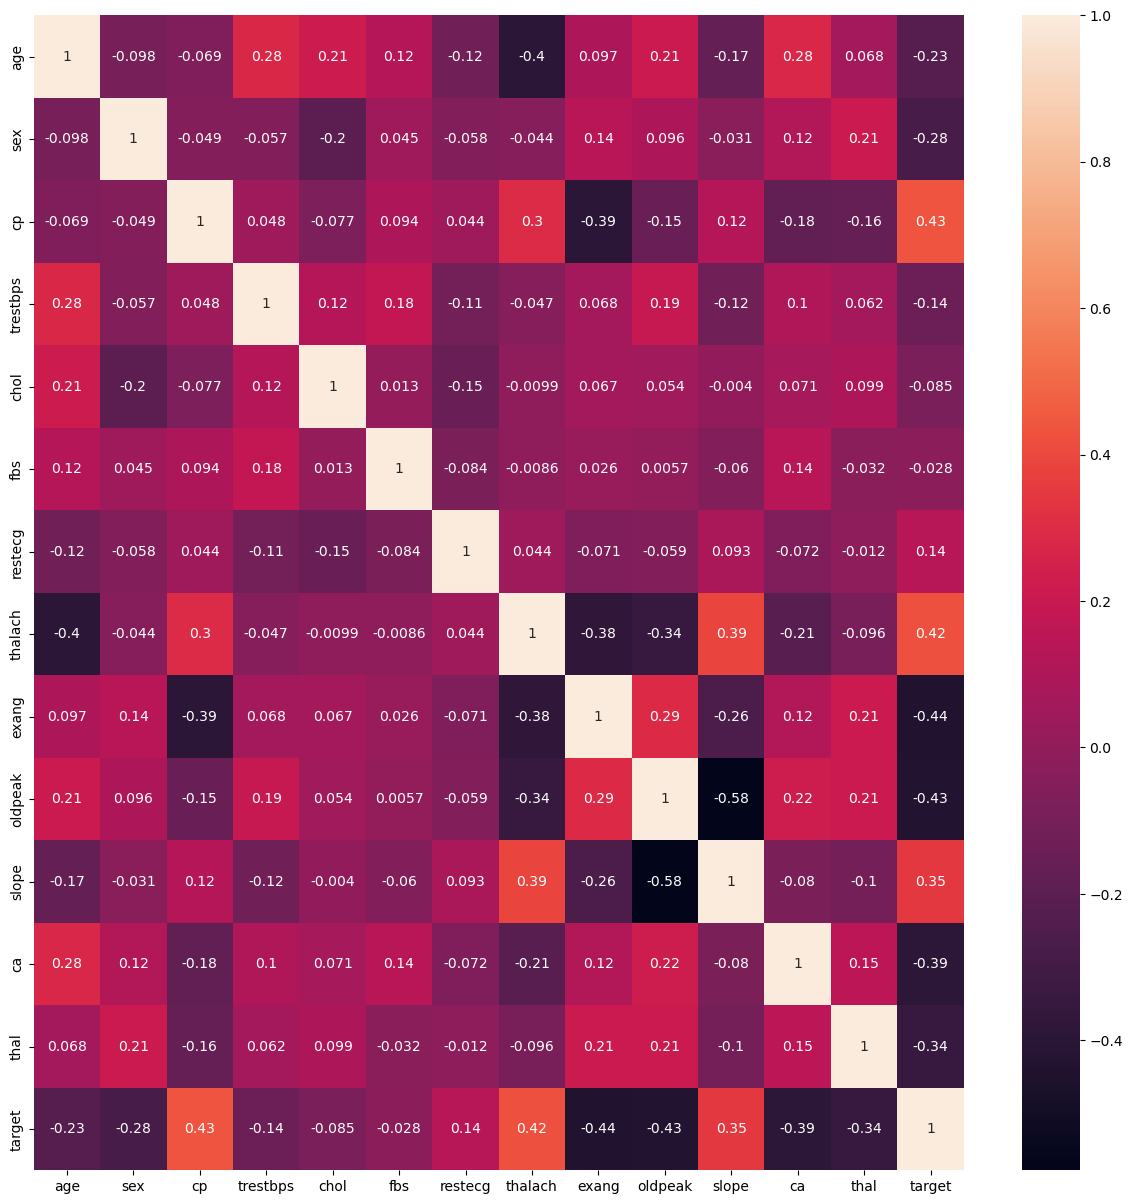

In [54]:
corr_relation_matrix = df['target']
corr_relation_matrix = df.corr() 
corr_relation_matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_relation_matrix,annot=True)
plt.show()

## It can be seen that the cp/thalach/slope have positive influence on target while oldpeak/exang have negative influence on the target

<Axes: xlabel='cp'>

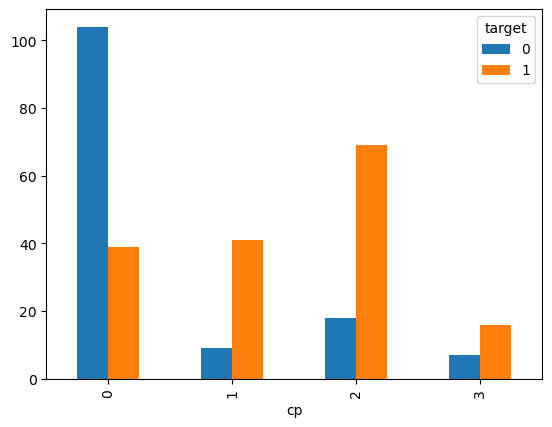

In [55]:
pd.crosstab(df['cp'],df['target']).plot.bar() ## It looks like CP with 2 is having most positive influence on the target

<Axes: xlabel='sex'>

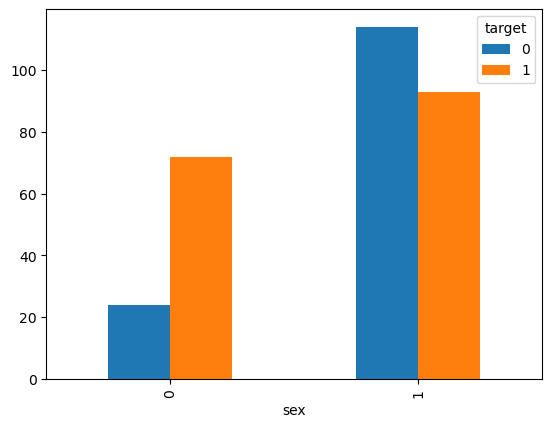

In [56]:
pd.crosstab(df['sex'],df['target']).plot.bar() ## it looks like males tend to have  more heart disease than fmales

<Axes: xlabel='age', ylabel='cp'>

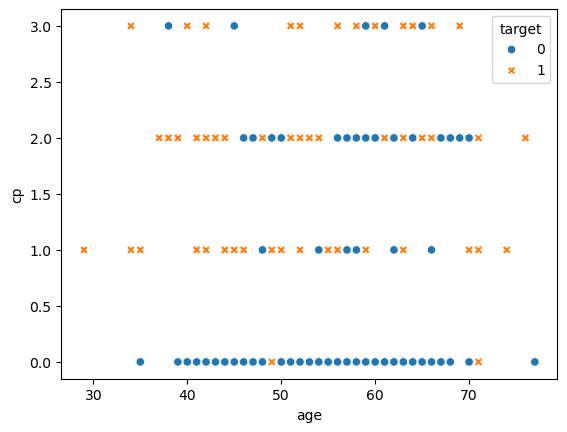

In [57]:
age_spect = pd.crosstab(df['age'],df['target'])
sns.scatterplot(x =df['age'],y = df['cp'],hue=df['target'],style = df['target']) ## Looks like chest pain is directly proportional to HD

<Axes: ylabel='Frequency'>

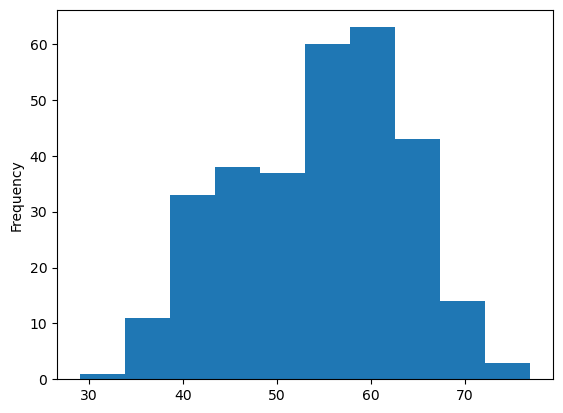

In [58]:
df['age'].plot.hist() ## It looks like most people age is between 40 to 60 age.

## Turning data as per model's requirement 

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
X = df.drop('target',axis=1)
y = df['target']

In [61]:
len(X),len(y)

(303, 303)

In [62]:
## Spliting data into training and testing 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
len(X_test),len(X_train),len(y_test),len(y_train)

(61, 242, 61, 242)

In [64]:
## Using RandomForestClassifier, LogisticRegression , KNeighborsClassifier
models = {'RandomForestClassifier': RandomForestClassifier(),
         'LogisticRegression' : LogisticRegression(),
         'KNeighborsClassifier':KNeighborsClassifier() }
def train_test(models,X_train,X_test,y_train,y_test):
    random_state = 42

    model_scores = {}

    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [65]:
model_scores = train_test(models,X_train,X_test,y_train,y_test)
model_scores

D:\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8524590163934426,
 'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344}

<Axes: >

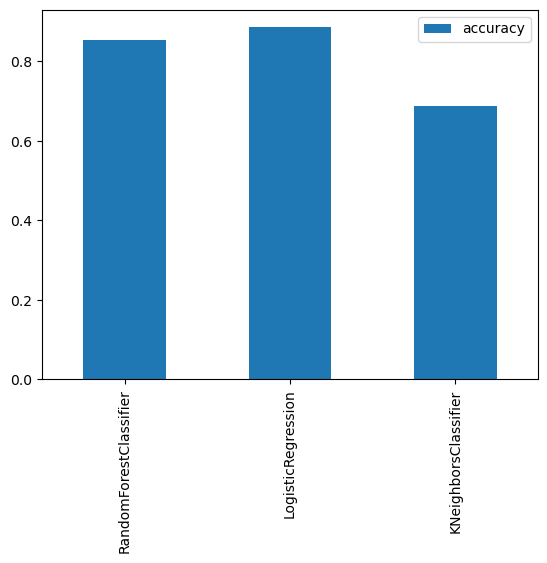

In [66]:
## Compare the model's perfomance
model_performance = pd.DataFrame(model_scores,index=['accuracy'])
model_performance.T.plot.bar()

In [67]:
## hyper parameter tunning for KNeighoursClassifier is to change the number of Neighours 
neighbours = range(1,21)
test = []
train = []
knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))    

In [68]:
print(f'test_acc = {sum(test)/len(test):.2f}, max_test_acc = {max(test):.2f}, train_acc = {max(train)}')

test_acc = 0.70, max_test_acc = 0.75, train_acc = 1.0


In [69]:
## Tunning Hyperparameters of RandomForestClassifier using RandomizedSearchCV
param_dist = {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None,3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

clf = RandomForestClassifier()

random_search = RandomizedSearchCV(clf,cv=5,param_distributions=param_dist,n_iter=10,verbose=True)

random_search.fit(X_train,y_train)

random_search.best_params_

random_search.score(X_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8688524590163934

In [70]:
## Hyperparameter tunning for the logistic regression using RandomizedSearchCV 

log_reg_grid = {
    'C': np.logspace(-4,4,20),
    'solver' : ['liblinear']
}

clf_log = LogisticRegression()

rs_clf_log = RandomizedSearchCV(clf_log,cv=5,n_iter=10,param_distributions=log_reg_grid,verbose=True)

rs_clf_log.fit(X_train,y_train)

rs_clf_log.best_params_

rs_clf_log.score(X_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8688524590163934

In [71]:
model_scores

{'RandomForestClassifier': 0.8524590163934426,
 'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344}

## It looks like logisticRegression is performing well as compared to other on test data.

In [72]:
# Hyperparameter tunning using GridsearchCV on LogisticRegression 

gs_clf_log = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,verbose=True,cv=5)

gs_clf_log.fit(X_train,y_train)

gs_clf_log.best_params_

gs_clf_log.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

## Evaluating the LogisticRegresion using confusion_matrix , precision, Recall ,F1_score

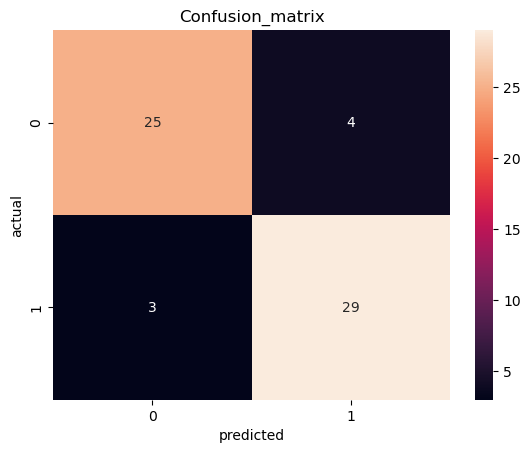

In [73]:
# Confusion Matrix 

y_pred = gs_clf_log.predict(X_test)

conf_matrix = confusion_matrix(y_test,y_pred)
plt.Figure(figsize=(2,2))
sns.heatmap(conf_matrix,cbar='False',annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion_matrix')
plt.show()

In [74]:
## Crossvalidated Precission,Recall,F1 Score,Accuracy 
cv_acc = cross_val_score(gs_clf_log,X,y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8446448087431694

In [75]:
## Crossvalidated Precission 
cv_prec = cross_val_score(gs_clf_log,X,y,cv=5,scoring='precision')
cv_prec = np.mean(cv_prec)
cv_prec

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8207936507936507

In [76]:
## Crossvalidated F1 score
cv_f1 = cross_val_score(gs_clf_log,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8673007976269721

In [77]:
cv_recall = cross_val_score(gs_clf_log,X,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9212121212121213

In [78]:
## Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



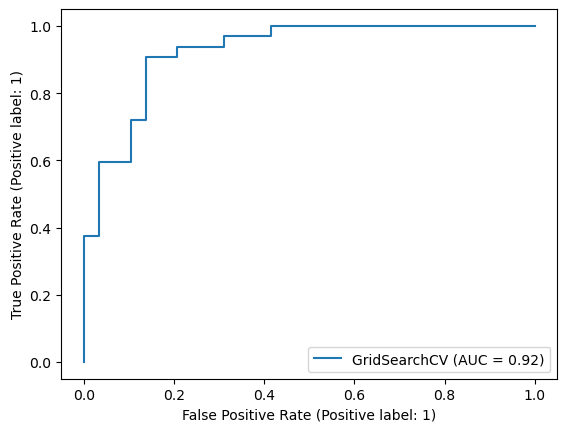

In [79]:
## plotting ROC curve and calculating AUC

RocCurveDisplay.from_estimator(gs_clf_log,X_test,y_test)

<Axes: title={'center': 'Corss val data'}>

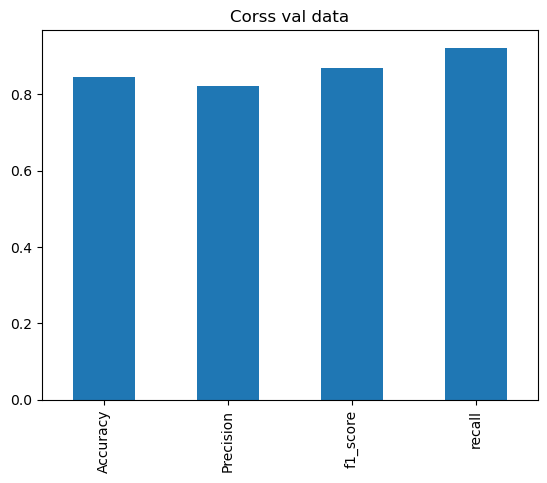

In [80]:
cross_val_data = pd.DataFrame({
    'Accuracy' : cv_acc,
    'Precision' : cv_prec,
    'f1_score' : cv_f1,
    'recall' : cv_recall
},index = [0])

cross_val_data.T.plot.bar(title = 'Corss val data' ,legend=False)

## Feature Importance

In [81]:
rs_clf_log.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [82]:
clf_log = LogisticRegression(solver='liblinear',C=0.23357214690901212)
clf_log.fit(X_train,y_train)
clf_log.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

<Axes: title={'center': 'Feature Importance'}>

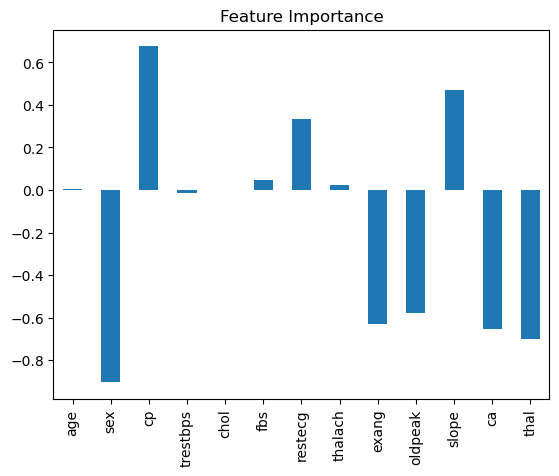

In [83]:
feature_coef = pd.DataFrame(dict(zip(df.columns,list(clf_log.coef_[0]))),index=[0])
feature_coef.T.plot.bar(legend=False,title='Feature Importance')

## Experimenting 

In [84]:
clf_log.score(X_test,y_test)

0.8852459016393442

In [85]:
## Dropping the least influencefetures from training and testing
X_mod = X.drop(columns=['age','trestbps','chol'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_mod,y,test_size=0.2,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

X_train.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,1,1,0,1,162,0,0.0,2,0,2
202,1,0,0,0,111,1,0.8,2,0,3
196,1,2,0,1,147,0,3.6,1,0,2
75,0,1,0,0,161,0,1.4,1,0,2
176,1,0,1,1,160,1,1.4,2,2,3


In [86]:
##  Fitting the RandomizedSearchCV LogisticRegression with modified data 
clf_log.fit(X_train,y_train)
clf_log.score(X_test,y_test)

0.8852459016393442

## Using Different classification model XGBoost

In [87]:
import xgboost as xgb

In [88]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8524590163934426

## Using Different Classification model Catboost 

In [89]:
from catboost import CatBoostClassifier,Pool

cat_features = [i for i,col in enumerate(X.columns) if X[col].dtype == 'object']

train_pool = Pool(X_train,y_train,cat_features = cat_features)

model = CatBoostClassifier(
    iterations = 1000,
    learning_rate = 0.1,
    depth = 6,
    loss_function = 'Logloss',
    eval_metric = 'Accuracy'
)

model.fit(train_pool);

model.score(X_test,y_test)

0:	learn: 0.8719008	total: 1.09ms	remaining: 1.09s
1:	learn: 0.8966942	total: 2.77ms	remaining: 1.38s
2:	learn: 0.9008264	total: 4.03ms	remaining: 1.34s
3:	learn: 0.8966942	total: 5.29ms	remaining: 1.32s
4:	learn: 0.8925620	total: 6.57ms	remaining: 1.31s
5:	learn: 0.8966942	total: 7.85ms	remaining: 1.3s
6:	learn: 0.9008264	total: 9.05ms	remaining: 1.28s
7:	learn: 0.9049587	total: 10.2ms	remaining: 1.27s
8:	learn: 0.8966942	total: 10.8ms	remaining: 1.19s
9:	learn: 0.8966942	total: 11.5ms	remaining: 1.13s
10:	learn: 0.9090909	total: 12.4ms	remaining: 1.12s
11:	learn: 0.8925620	total: 13.4ms	remaining: 1.1s
12:	learn: 0.9049587	total: 14.4ms	remaining: 1.09s
13:	learn: 0.9090909	total: 15.4ms	remaining: 1.08s
14:	learn: 0.9090909	total: 16.8ms	remaining: 1.1s
15:	learn: 0.9173554	total: 18.1ms	remaining: 1.12s
16:	learn: 0.9173554	total: 19.2ms	remaining: 1.11s
17:	learn: 0.9256198	total: 20.1ms	remaining: 1.1s
18:	learn: 0.9256198	total: 21.2ms	remaining: 1.09s
19:	learn: 0.9256198	total

0.8688524590163934

## From the experimenation it looks like the LogisticRegression is the most efficient model for this project

In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
corr_relation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
